In [5]:
# Step-by-step installation of PyTorch Geometric (for Colab)
# First, install PyTorch that matches the CUDA version (or use CPU-only)

!pip install torch torchvision torchaudio

# Now install torch-scatter, torch-sparse, torch-cluster, and torch-spline-conv
# These are dependencies required by torch_geometric
# These wheels are built for the currently running version of PyTorch

# Use correct links from the official PyTorch Geometric site
# For CPU-only:
''' !pip install torch-scatter -f https://data.pyg.org/whl/torch-2.1.0+cpu.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.1.0+cpu.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-2.1.0+cpu.html
!pip install torch-spline-conv -f https://data.pyg.org/whl/torch-2.1.0+cpu.html '''

# Finally, install torch-geometric
!pip install torch-geometric


  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl (363.4 MB)
Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl (13.8 MB)
Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py

In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Youtube01-Psy.csv')

# Display the first few rows
print(df.head())


                                    COMMENT_ID            AUTHOR  \
0  LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU         Julius NM   
1  LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A       adam riyati   
2  LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8  Evgeny Murashkin   
3          z13jhp0bxqncu512g22wvzkasxmvvzjaz04   ElNino Melendez   
4          z13fwbwp1oujthgqj04chlngpvzmtt3r3dw            GsMega   

                  DATE                                            CONTENT  \
0  2013-11-07T06:20:48  Huh, anyway check out this you[tube] channel: ...   
1  2013-11-07T12:37:15  Hey guys check out my new channel and our firs...   
2  2013-11-08T17:34:21             just for test I have to say murdev.com   
3  2013-11-09T08:28:43   me shaking my sexy ass on my channel enjoy ^_^ ﻿   
4  2013-11-10T16:05:38            watch?v=vtaRGgvGtWQ   Check this out .﻿   

   CLASS  
0      1  
1      1  
2      1  
3      1  
4      1  


In [8]:
!pip install tensorflow


In [9]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Flatten
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv

# Load dataset
df = pd.read_csv("Youtube01-Psy.csv")
df.rename(columns={"CLASS": "label"}, inplace=True)

# Encode label (0: ham, 1: spam)
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

# Convert text to TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=300)
X = tfidf.fit_transform(df["CONTENT"]).toarray()
y = df["label"].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape for DL models
X_train_dl = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_dl = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# CNN Model
cnn = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_train_dl.shape[1], 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.fit(X_train_dl, y_train, epochs=5, batch_size=16, verbose=0)
y_prob_cnn = cnn.predict(X_test_dl).flatten()

# LSTM Model
lstm = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train_dl.shape[1], 1)),
    LSTM(32),
    Dense(1, activation='sigmoid')
])
lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm.fit(X_train_dl, y_train, epochs=5, batch_size=16, verbose=0)
y_prob_lstm = lstm.predict(X_test_dl).flatten()

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_scaled, y_train)
y_prob_xgb = xgb.predict_proba(X_test_scaled)[:, 1]

# SVM
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_scaled, y_train)
y_prob_svm = svm.predict_proba(X_test_scaled)[:, 1]

# GNN Model
class GNN(torch.nn.Module):
    def __init__(self, num_features):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(num_features, 16)
        self.conv2 = GCNConv(16, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = torch.sigmoid(self.conv2(x, edge_index))
        return x.view(-1)

# Constructing the graph
num_nodes = X_train_scaled.shape[0] + X_test_scaled.shape[0]
edge_index = torch.combinations(torch.arange(num_nodes), r=2).t().contiguous()
x = torch.tensor(np.vstack((X_train_scaled, X_test_scaled)), dtype=torch.float)
y_tensor = torch.tensor(np.hstack((y_train, y_test)), dtype=torch.float)

data = Data(x=x, edge_index=edge_index, y=y_tensor)

# Splitting the data
train_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)
train_mask[:len(y_train)] = True
test_mask[len(y_train):] = True

data.train_mask = train_mask
data.test_mask = test_mask

# Training the GNN
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GNN(num_features=x.shape[1]).to(device)
data = data.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data)
    loss = F.binary_cross_entropy(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

# GNN Predictions
model.eval()
with torch.no_grad():
    y_prob_gnn = model(data)[data.test_mask].cpu().numpy()

# Ensemble
ensemble_probs = (y_prob_cnn + y_prob_lstm + y_prob_rf + y_prob_xgb + y_prob_svm + y_prob_gnn) / 6
y_pred_ensemble = (ensemble_probs > 0.5).astype(int)

# Results
print("\nClassification Report (Ensemble):")
print(classification_report(y_test, y_pred_ensemble))

# Accuracy Summary
models = ["CNN", "LSTM", "Random Forest", "XGBoost", "SVM", "GNN", "Ensemble"]
accuracies = [
    accuracy_score(y_test, (y_prob_cnn > 0.5)),
    accuracy_score(y_test, (y_prob_lstm > 0.5)),
    accuracy_score(y_test, (y_prob_rf > 0.5)),
    accuracy_score(y_test, (y_prob_xgb > 0.5)),
    accuracy_score(y_test, (y_prob_svm > 0.5)),
    accuracy_score(y_test, (y_prob_gnn > 0.5)),
    accuracy_score(y_test, y_pred_ensemble)
]
df_acc = pd.DataFrame({"Model": models, "Accuracy": accuracies})
print("\nAccuracy Summary:")
print(df_acc)


/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_cluster/_version_cpu.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-cluster'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:113: UserWarning: An issue occurred while importing 'torch-spline-conv'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_spline_conv/_version_cpu.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:124: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_sparse/_version_cpu.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while i

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:35:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Classification Report (Ensemble):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        43

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70


Accuracy Summary:
           Model  Accuracy
0            CNN  0.900000
1           LSTM  0.571429
2  Random Forest  0.957143
3        XGBoost  0.957143
4            SVM  0.928571
5            GNN  0.385714
6       Ensemble  1.000000


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-10-fbca1388fdd3>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='Set2')


label
spam    175
ham     175
Name: count, dtype: int64
                                    COMMENT_ID            AUTHOR  \
0  LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU         Julius NM   
1  LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A       adam riyati   
2  LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8  Evgeny Murashkin   
3          z13jhp0bxqncu512g22wvzkasxmvvzjaz04   ElNino Melendez   
4          z13fwbwp1oujthgqj04chlngpvzmtt3r3dw            GsMega   

                  DATE                                            CONTENT  \
0  2013-11-07T06:20:48  Huh, anyway check out this you[tube] channel: ...   
1  2013-11-07T12:37:15  Hey guys check out my new channel and our firs...   
2  2013-11-08T17:34:21             just for test I have to say murdev.com   
3  2013-11-09T08:28:43   me shaking my sexy ass on my channel enjoy ^_^ ﻿   
4  2013-11-10T16:05:38            watch?v=vtaRGgvGtWQ   Check this out .﻿   

  label  
0  spam  
1  spam  
2  spam  
3  spam  
4  spam  


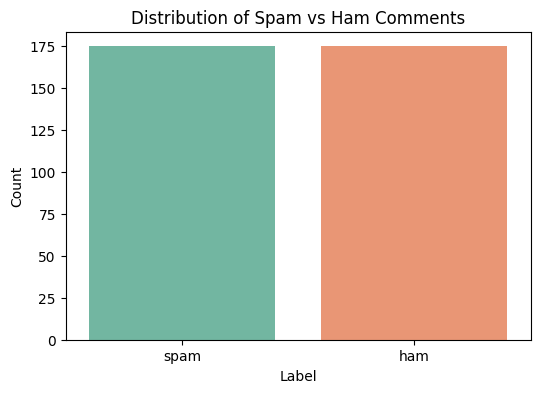

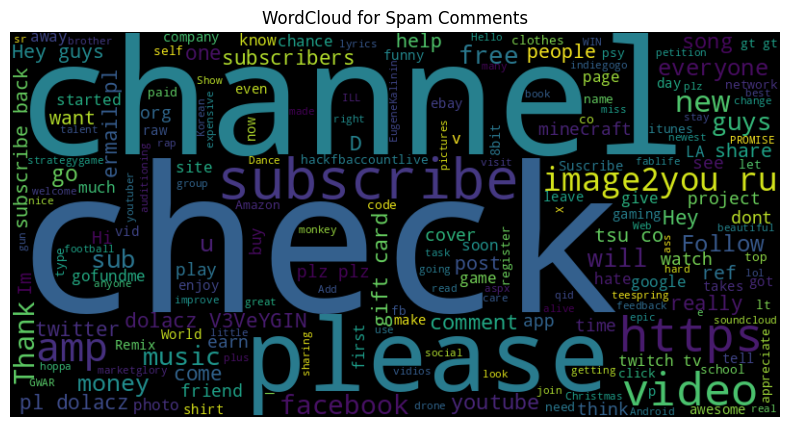

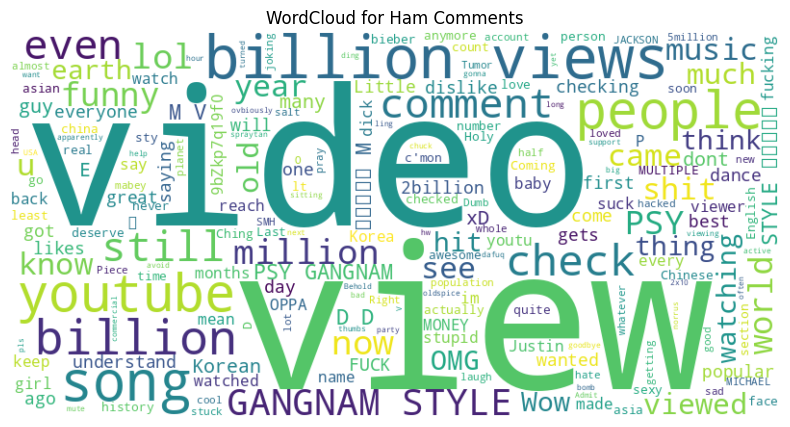

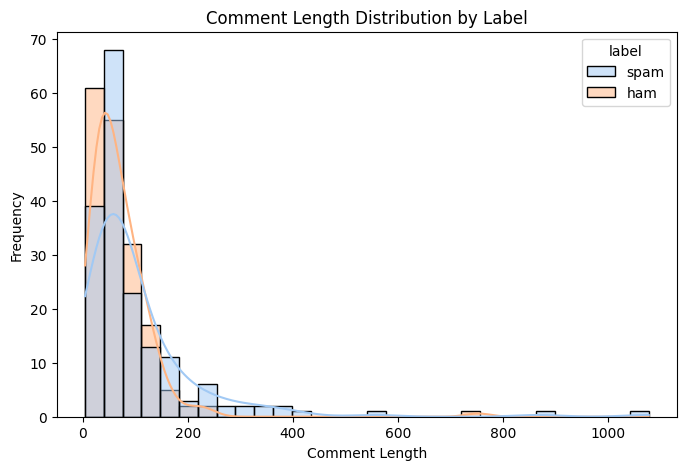

In [10]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Download stopwords if not already
nltk.download('stopwords')

# Load Dataset
df = pd.read_csv("Youtube01-Psy.csv")  # Make sure the CSV file is in your path
df.rename(columns={"CLASS": "label"}, inplace=True)

# Map 0 as 'ham' and 1 as 'spam'
df['label'] = df['label'].map({0: 'ham', 1: 'spam'})

# Show basic info
print(df['label'].value_counts())
print(df.head())

# 🔹 1. Count Plot of Spam vs Ham
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='label', palette='Set2')
plt.title('Distribution of Spam vs Ham Comments')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# 🔹 2. WordCloud for Spam Comments
spam_comments = " ".join(df[df['label'] == 'spam']['CONTENT'])
spam_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(spam_comments)

plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Spam Comments')
plt.show()

# 🔹 3. WordCloud for Ham Comments
ham_comments = " ".join(df[df['label'] == 'ham']['CONTENT'])
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_comments)

plt.figure(figsize=(10, 5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Ham Comments')
plt.show()

# 🔹 4. Comment Length Distribution by Label
df['comment_length'] = df['CONTENT'].apply(len)

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='comment_length', hue='label', bins=30, kde=True, palette='pastel')
plt.title('Comment Length Distribution by Label')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.show()


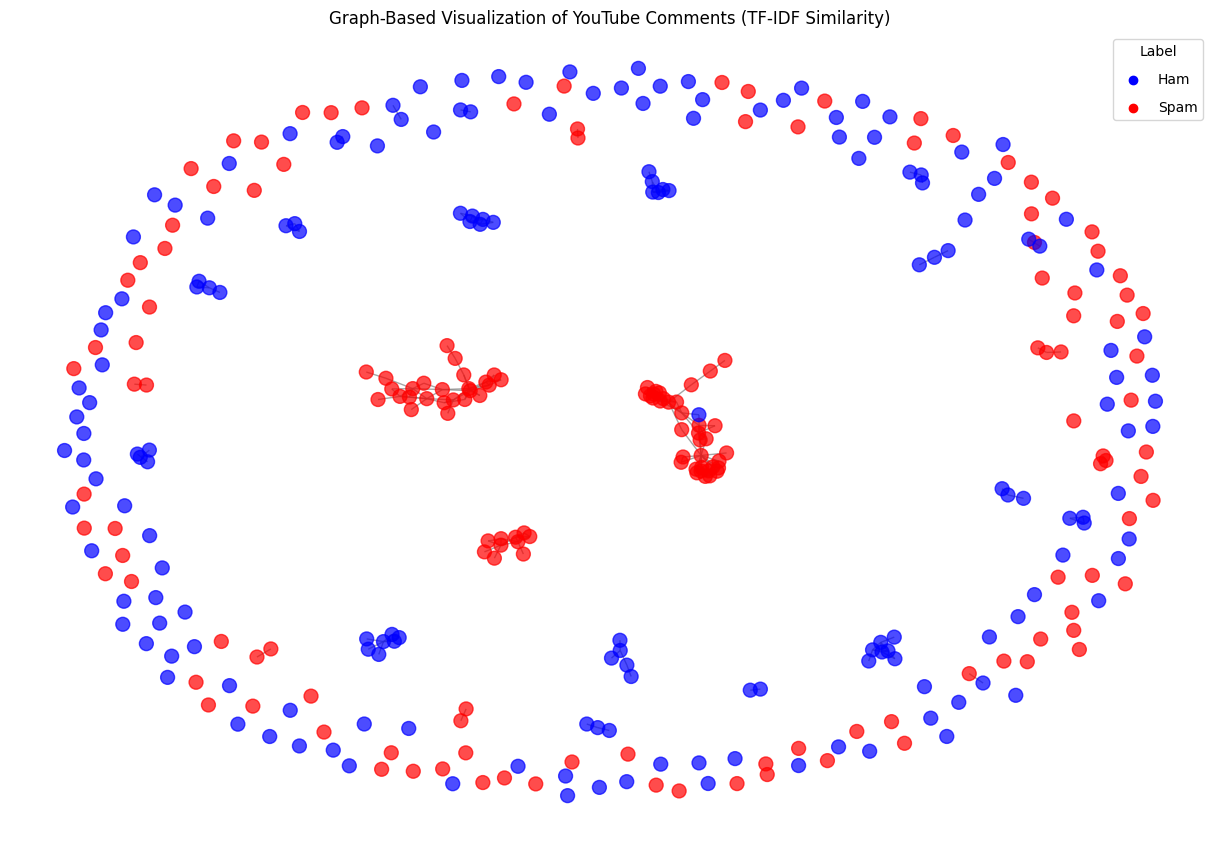

In [11]:
# Required installations (run if not already installed)
!pip install pandas matplotlib scikit-learn networkx

import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

# Load Dataset (make sure the CSV is uploaded or available)
df = pd.read_csv("Youtube01-Psy.csv")
df.rename(columns={"CLASS": "label"}, inplace=True)

# Encode labels (0 = ham, 1 = spam)
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

# Use TF-IDF for text vectorization
vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(df['CONTENT']).toarray()
labels = df['label'].values

# Build similarity graph based on cosine similarity
similarity_matrix = cosine_similarity(X)
threshold = 0.7

G = nx.Graph()

# Add nodes with label attribute
for i in range(len(df)):
    G.add_node(i, label=labels[i], text=df['CONTENT'][i])

# Add edges based on similarity
for i in range(len(similarity_matrix)):
    for j in range(i + 1, len(similarity_matrix)):
        if similarity_matrix[i][j] > threshold:
            G.add_edge(i, j, weight=similarity_matrix[i][j])

# Draw the graph with node color by class
pos = nx.spring_layout(G, seed=42)  # layout for positioning

node_colors = ['red' if G.nodes[n]['label'] == 1 else 'blue' for n in G.nodes]

plt.figure(figsize=(12, 8))
nx.draw(
    G,
    pos,
    with_labels=False,
    node_color=node_colors,
    node_size=100,
    edge_color='gray',
    alpha=0.7
)

legend_labels = {0: "Ham", 1: "Spam"}
for value, label in legend_labels.items():
    plt.scatter([], [], c='red' if value else 'blue', label=label)
plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title="Label")

plt.title("Graph-Based Visualization of YouTube Comments (TF-IDF Similarity)")
plt.axis("off")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


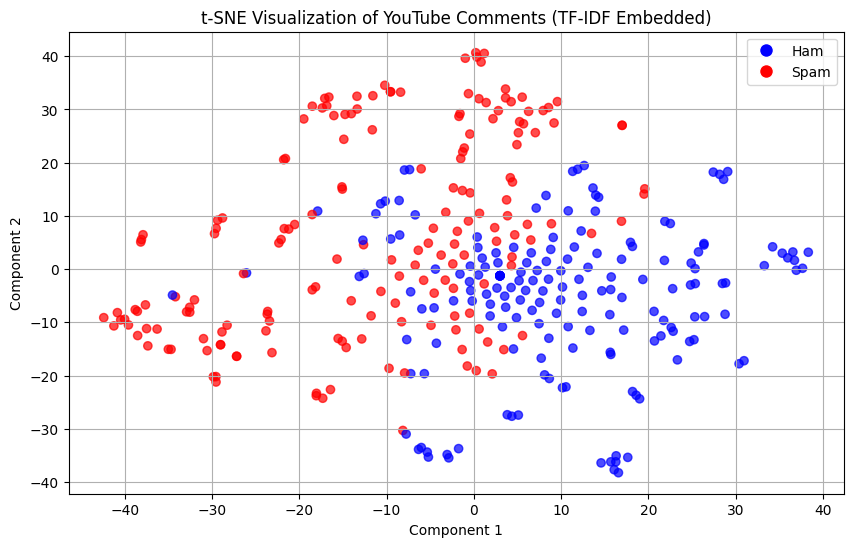

In [12]:
# Install dependencies (if needed)
!pip install pandas matplotlib scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE

# Load dataset
df = pd.read_csv("Youtube01-Psy.csv")
df.rename(columns={"CLASS": "label"}, inplace=True)

# Encode labels
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=200)
X = vectorizer.fit_transform(df['CONTENT']).toarray()
y = df['label']

# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=10, n_iter=1000)
X_embedded = tsne.fit_transform(X)

# Plot
plt.figure(figsize=(10, 6))
colors = ['blue' if label == 0 else 'red' for label in y]
labels_text = ['Ham' if label == 0 else 'Spam' for label in y]

plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=colors, alpha=0.7)
plt.title("t-SNE Visualization of YouTube Comments (TF-IDF Embedded)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='Ham', markerfacecolor='blue', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Spam', markerfacecolor='red', markersize=10)
])
plt.grid(True)
plt.show()



📊 Evaluation Metrics for CNN:
Accuracy       : 0.9000
Precision      : 0.9286
Recall         : 0.9070
F1 Score       : 0.9176
ROC AUC Score  : 0.9664
Confusion Matrix:
[[24  3]
 [ 4 39]]

📊 Evaluation Metrics for LSTM:
Accuracy       : 0.5714
Precision      : 0.8421
Recall         : 0.3721
F1 Score       : 0.5161
ROC AUC Score  : 0.7537
Confusion Matrix:
[[24  3]
 [27 16]]

📊 Evaluation Metrics for Random Forest:
Accuracy       : 0.9571
Precision      : 0.9762
Recall         : 0.9535
F1 Score       : 0.9647
ROC AUC Score  : 0.9931
Confusion Matrix:
[[26  1]
 [ 2 41]]

📊 Evaluation Metrics for XGBoost:
Accuracy       : 0.9571
Precision      : 0.9545
Recall         : 0.9767
F1 Score       : 0.9655
ROC AUC Score  : 0.9854
Confusion Matrix:
[[25  2]
 [ 1 42]]

📊 Evaluation Metrics for SVM:
Accuracy       : 0.9286
Precision      : 0.9318
Recall         : 0.9535
F1 Score       : 0.9425
ROC AUC Score  : 0.9836
Confusion Matrix:
[[24  3]
 [ 2 41]]

📊 Evaluation Metrics for GNN:
Accuracy      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


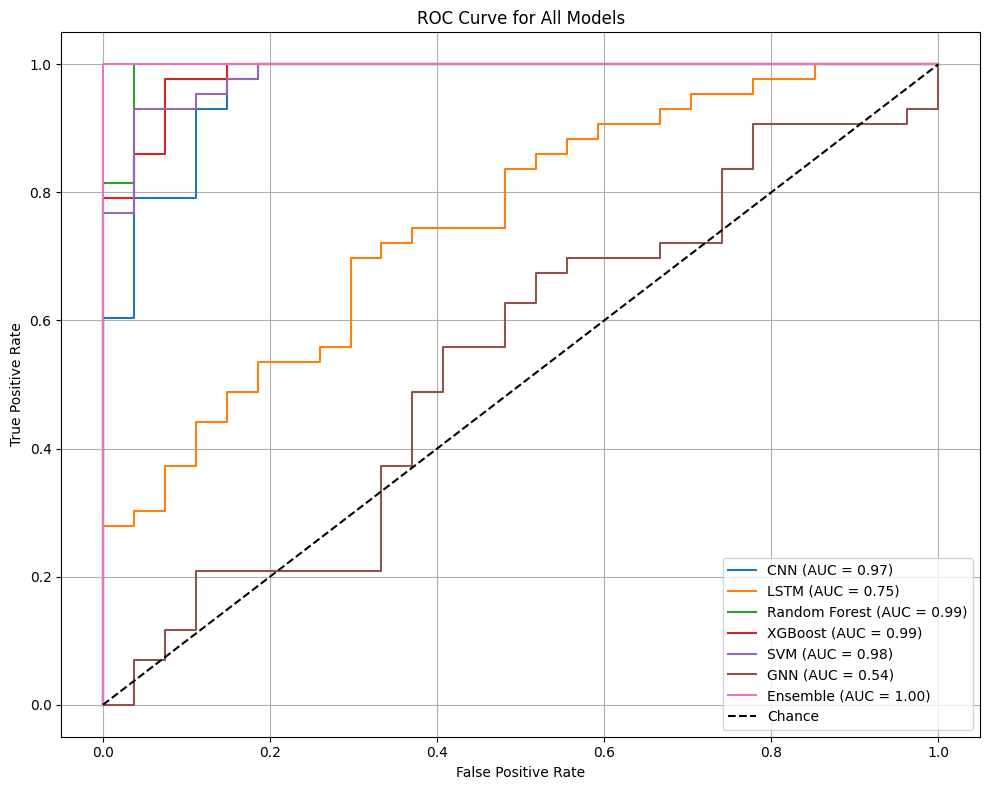

In [13]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix,
    roc_curve
)
import matplotlib.pyplot as plt

def evaluate_model(name, y_true, y_prob, threshold=0.5):
    y_pred = (y_prob > threshold).astype(int)

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_prob)
    cm = confusion_matrix(y_true, y_pred)

    print(f"\n📊 Evaluation Metrics for {name}:")
    print(f"Accuracy       : {acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"ROC AUC Score  : {roc_auc:.4f}")
    print("Confusion Matrix:")
    print(cm)

    fpr, tpr, _ = roc_curve(y_true, y_prob)
    return (fpr, tpr, roc_auc, name)

# Collect ROC Curves
curves = []
curves.append(evaluate_model("CNN", y_test, y_prob_cnn))
curves.append(evaluate_model("LSTM", y_test, y_prob_lstm))
curves.append(evaluate_model("Random Forest", y_test, y_prob_rf))
curves.append(evaluate_model("XGBoost", y_test, y_prob_xgb))
curves.append(evaluate_model("SVM", y_test, y_prob_svm))
curves.append(evaluate_model("GNN", y_test, y_prob_gnn))
curves.append(evaluate_model("Ensemble", y_test, ensemble_probs))

# Plot ROC Curves
plt.figure(figsize=(10, 8))
for fpr, tpr, auc_score, name in curves:
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for All Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

# Define GCN model
class GCN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return x

# Re-initialize GNN
input_dim = data.num_node_features
hidden_dim = 16
output_dim = 1
gnn = GCN(input_dim, hidden_dim, output_dim)

# Move to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
gnn = gnn.to(device)
data = data.to(device)

# Optimizer and loss
optimizer = torch.optim.Adam(gnn.parameters(), lr=0.01)
loss_fn = nn.BCEWithLogitsLoss()

# Train GNN on all data
gnn.train()
for epoch in range(100):
    optimizer.zero_grad()
    out = gnn(data.x, data.edge_index).squeeze()
    loss = loss_fn(out, data.y.float())
    loss.backward()
    optimizer.step()


In [15]:
# Predict GNN probabilities for all rows
gnn.eval()
with torch.no_grad():
    out_all = gnn(data.x, data.edge_index)
    y_prob_gnn = torch.sigmoid(out_all).squeeze().cpu().numpy()


In [82]:
''' print(len(y_prob_cnn))
print(len(y_prob_lstm))
print(len(y_prob_rf))
print(len(y_prob_xgb))
print(len(y_prob_svm))
print(len(y_prob_gnn))

print(len(df))

print(len(ensemble_probs_all))
print(len(y_pred_ensemble_all)) '''


ensemble_probs_all = (y_prob_cnn + y_prob_lstm + y_prob_rf + y_prob_xgb + y_prob_svm + y_prob_gnn) / 6
y_pred_ensemble_all = (ensemble_probs_all > 0.80).astype(int)

'''
# Step 1: Save indices before splitting
X = df.drop("label", axis=1)
y = df["label"]
indices = df.index  # This saves the original row indices

# Step 2: Split with index tracking
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, indices, test_size=0.2, random_state=42
)


full_results_df = df.loc[X_test.index].copy() '''

full_results_df = df.copy()

full_results_df["Predicted_Prob"] = ensemble_probs_all
full_results_df["Predicted_Label"] = y_pred_ensemble_all

# Save and show
full_results_df.to_csv("youtube_spam_all_predicted.csv", index=False)
full_results_df.head(10)


,COMMENT_ID,AUTHOR,DATE,CONTENT,label,Predicted_Prob,Predicted_Label
0,z12lg1vizrmsgxm3q23oij4aqrjxjdd1p,Holly,2014-11-06T13:41:30,Follow me on Twitter @mscalifornia95﻿,1,0.795577,0
1,z13qyxk5tzq1e5asx22xjt3wdq3ns32f5,Ameenk Chanel,2014-11-14T11:50:02,Free my apps get 1m crdits ! Just click on the...,1,0.779162,0
2,z12ig3jrnlfvsthaa04chjkrply5zligbdg,Aaa Aaa,2014-11-12T05:46:27,PLEASE SUBSCRIBE ME!!!!!!!!!!!!!!!!!!!!!!!!!!!...,1,0.807438,1
3,z130i3yaexrmtxyic04ccnk5hwvfs33as0c,Alucard Hellsing,2014-11-07T22:21:29,What Can i say....This Song He Just Change The...,0,0.486009,0
4,z12yinh5ks2oinqzn04cctkgvvrohbrazvo0k,Rancy Gaming,2014-11-06T09:41:07,What free gift cards? Go here http://www.swag...,1,0.783915,0
5,z12qfjubxk2iftnwk04chp5amsmmuvpwh5w,FaceTheFacts,2014-11-08T07:07:44,You know a song sucks dick when you need to us...,0,0.395646,0
6,z13xwborhli2vdrab04chblgxvjattz4ezs0k,Luna Gamer Potter,2014-11-09T02:42:40,I hate this song! ﻿,0,0.176142,0
7,z13wj1pgwlfjjjn4d04cilo5nwnhsbdavzg0k,Tee Tee,2014-11-07T20:16:51,Loool nice song funny how no one understands (...,0,0.441643,0
8,z13nw3lhgt2nf5wwe04cdlx5iyaydznrve0,Wert Walleet,2014-11-08T09:15:22,"This song is great there are 2,127,315,950 vie...",0,0.171064,0
9,z122dfb5htjxgpbot04cdj1aikatybbjsb0,Kitts Hausman,2014-11-07T04:48:01,It's so funny it's awesomeness lol aaaaaaa sex...,0,0.197357,0


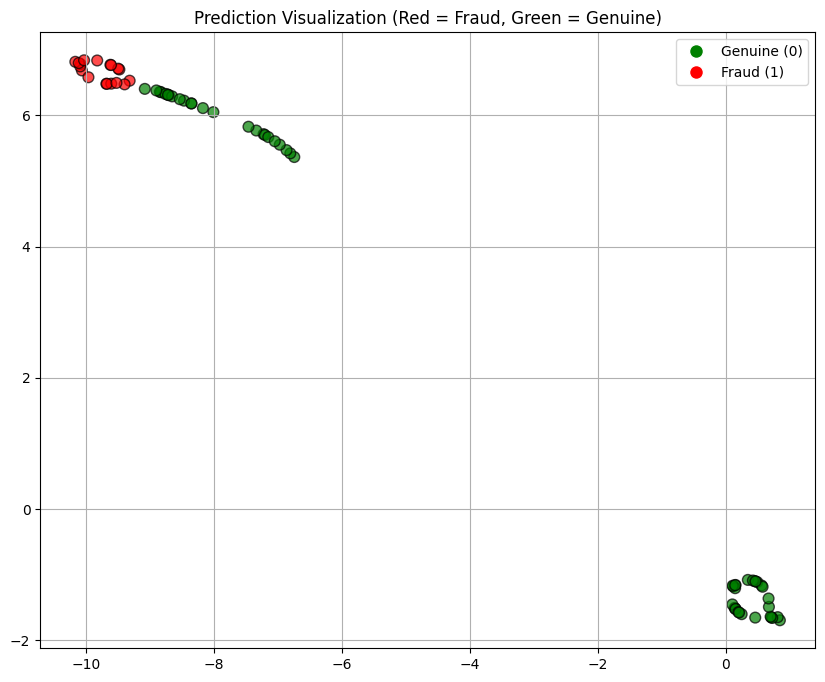

In [83]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming full_results_df is already loaded and has the predictions

# Ensure the column exists
assert "Predicted_Label" in full_results_df.columns, "Missing 'Predicted_Label' column in full_results_df."

# Select only numeric columns for t-SNE
numeric_features = full_results_df.select_dtypes(include=['int64', 'float64'])

# Remove the label column from features
features = numeric_features.drop(columns=["Predicted_Label"])

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
embedding_2d = tsne.fit_transform(features.values)

# Set colors based on predicted labels
colors = ['green' if label == 0 else 'red' for label in full_results_df["Predicted_Label"]]

# Plot
plt.figure(figsize=(10, 8))
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=colors, edgecolors='k', s=60, alpha=0.7)
plt.title("Prediction Visualization (Red = Fraud, Green = Genuine)")
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='Genuine (0)', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Fraud (1)', markerfacecolor='red', markersize=10)
])
plt.grid(True)
plt.show()
